Text(0.5,1.05,'MFCC CMVN 301')

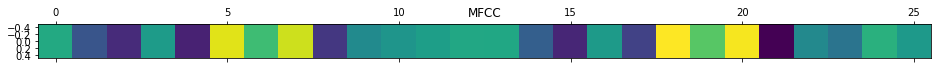

<Figure size 432x288 with 0 Axes>

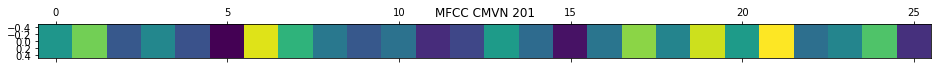

<Figure size 432x288 with 0 Axes>

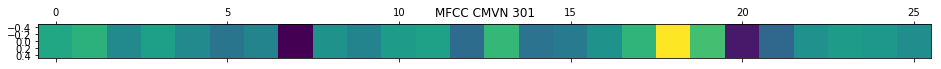

In [39]:
from obspy import read, UTCDateTime
import numpy as np
import glob
import matplotlib.pyplot as plt
from python_speech_features import mfcc, logfbank, delta
import speechpy as spe
%matplotlib inline

p_files = glob.glob("/home/daniel/Data/wf/P/*.mseed")
n_files = glob.glob("/home/daniel/Data/wf/N/*.mseed")
ruta_p = "/home/daniel/Data/wf/P/P_SGC2018hhuz_20180414-211832_HHE.mseed"
ruta_s = "/home/daniel/Data/wf/S/S_SGC2018gocz_20180404-023835_HHE.mseed"
ruta_n = "/home/daniel/Data/wf/N/N_SGC2018gohj_20180404-045038_HHZ.mseed"

wf = [ruta_p, ruta_s, ruta_n]

st = read(n_files[4])
#latest_start = np.max([x.stats.starttime for x in st])
#earliest_stop = np.min([x.stats.endtime for x in st])
#st.trim(latest_start, earliest_stop)
st.detrend(type='linear')
tr =st[0]
delta = tr.stats.delta
df = tr.stats.sampling_rate
x = tr.data
feat_mfcc_ = mfcc(x, df, 200/df, 80/df)
feat_new = feat_mfcc_.reshape(1,feat_mfcc_.shape[1]*feat_mfcc_.shape[0])
mfcc_cmvn_201 = spe.processing.cmvnw(feat_new,201, variance_normalization=False)
mfcc_cmvn_301 = spe.processing.cmvnw(feat_new,301, variance_normalization=True)

plt.matshow(feat_new)
plt.title("MFCC")
plt.figure(clear=True)
plt.matshow(mfcc_cmvn_201)
plt.title("MFCC CMVN 201")
plt.figure(clear=True)
plt.matshow(mfcc_cmvn_301)
plt.title("MFCC CMVN 301")
#st.filter("bandpass", freqmin=filt[2][0], freqmax=filt[2][1], corners=4)
#st_.spectrogram(log=False, title=st[0].stats.station +" "+ str(st[0].stats.starttime))

La idea es que la matriz $X$ de características contenga una columnta por cada característica. Por lo pronto 16. Tres de las componentes normales, 12 de las componente filtradas (4 filtros) y 3 de los espectogramas a cada componente 

100.0

MFCC:
Number of windows = 1
Length of each feature = 26
100.0

MFCC:
Number of windows = 1
Length of each feature = 26
100.0

MFCC:
Number of windows = 1
Length of each feature = 26


<Figure size 432x288 with 0 Axes>

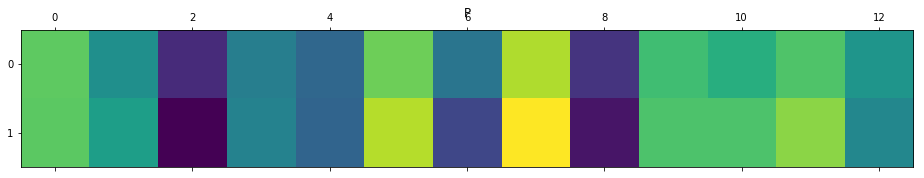

<Figure size 432x288 with 0 Axes>

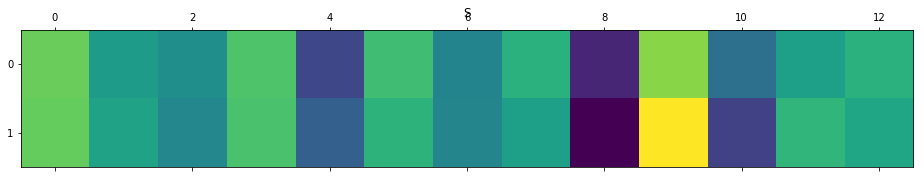

<Figure size 432x288 with 0 Axes>

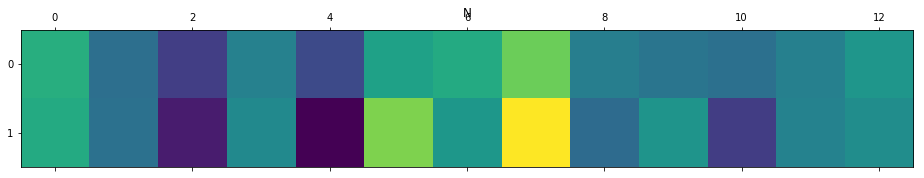

In [11]:

for w in wf:
    # obteniendo si la forma de onda es de P, S o ruido
    ph_type = w.split("/")[-1].split("_")[0]
    st_ = read(w)
    st = st_.copy()
    
    # se corta para que tengan el mismo número de datos
    latest_start = np.max([x.stats.starttime for x in st])
    earliest_stop = np.min([x.stats.endtime for x in st])
    st.trim(latest_start, earliest_stop)
    
    st.detrend(type='linear')
    tr =st[0]
    df = tr.stats.sampling_rate
    x = tr.data
    print(df)
    # obteniendo los coeficientes MFCC
    """winlen representa el largo de la ventana en segundos, con 200/df se selecciona 
       una ventana de 200 datos. winstep es la ventana de deslizamiento, calcula una nueva
       ventana cada 80 datos.
       En numcep se selecciona el número de coeficientes de la transformada discreta de coseno
       que se cogeran. Se pueden un máximo del parámetro nfilt, que por defecto es 26, acá se 
       seleccionó para coger los primeros 13 coeficientes (estandar en ASR).
       
       Como la función mfcc devuelve una matriz de total ventanas calculadas por numcep, se hizo
       un reshape para dejar los datos en un solo vector fila"""
    feat_mfcc_ = mfcc(x, df, 200/df, 80/df)
    feat_new = feat_mfcc_.reshape(1,feat_mfcc_.shape[1]*feat_mfcc_.shape[0])
    print('\nMFCC:\nNumber of windows =', feat_new.shape[0])
    print('Length of each feature =', feat_new.shape[1])
    plt.figure(clear=True)
    plt.matshow(feat_mfcc_)
    plt.title(ph_type)


**get_filterbanks** es la función que define los filtros para calcular los filterbanks. Habría que modificarla para asegurarse que considere frecuencias relevantes en los sismos. Para ello también hay que modificar la función **hz2mel** que define la escala de Mel. 

Text(0.5,1.05,'delta MFCC')

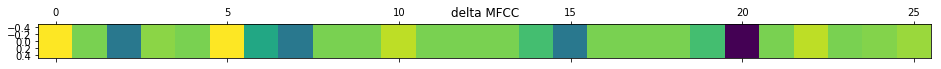

In [3]:
d_mfcc_feat = delta(feat_new, 2)
#d_mfcc_feat.shape
plt.matshow(d_mfcc_feat)
plt.title('delta MFCC')

IndexError: list index out of range

In [ ]:
tr = st[0]

In [ ]:
tr.stats.channel